<a href="https://colab.research.google.com/github/cgpavon/PruebaRenderFlask/blob/main/EjemploLCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Número de filas y columnas: (100, 5)
Primeras 5 filas:
              1. open   2. high    3. low  4. close  5. volume
2024-04-16  171.7500  173.7600  168.2700    169.38   72689488
2024-04-15  175.3600  176.6300  172.5000    172.69   73531773
2024-04-12  174.2600  178.3600  174.2100    176.55  101670886
2024-04-11  168.3400  175.4600  168.1600    175.04   91070275
2024-04-10  168.8000  169.0900  167.1100    167.78   49709336

Estadísticas descriptivas:
         4. close
count  100.00000
mean   183.55730
std      9.16504
min    167.78000
25%    173.61750
50%    185.09000
75%    191.37250
max    198.11000


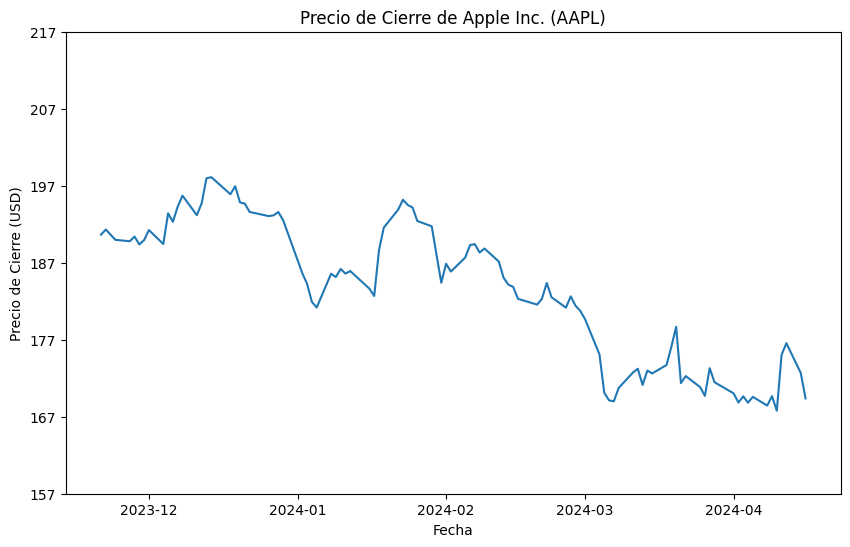

In [3]:
# Importar las bibliotecas necesarias
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Definir la URL de la API REST y la clave de API
url = "https://www.alphavantage.co/query"
api_key = "DBAIZF5VG1K7MZWB"

# Definir los parámetros de la solicitud
params = {
    "function": "TIME_SERIES_DAILY",
    "symbol": "AAPL",
    "apikey": api_key
}

# Realizar la solicitud GET a la API
response = requests.get(url, params=params)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Obtener los datos de la respuesta en formato JSON
    data = response.json()

    # Extraer los datos del objeto JSON
    time_series = data["Time Series (Daily)"]

    # Crear un DataFrame de Pandas a partir de los datos
    df = pd.DataFrame.from_dict(time_series, orient="index")

    # Convertir el índice a formato de fecha
    df.index = pd.to_datetime(df.index)

    # Convertir la columna "4. close" a valores numéricos
    df["4. close"] = df["4. close"].astype(float)

    # Análisis básico del DataFrame
    print("Número de filas y columnas:", df.shape)
    print("Primeras 5 filas:\n", df.head())
    print("\nEstadísticas descriptivas:\n", df.describe())

    # Crear un gráfico de líneas para el precio de cierre
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df["4. close"])
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre (USD)")
    plt.title("Precio de Cierre de Apple Inc. (AAPL)")

    # Mejorar la visualización del eje de precio
    plt.ylim(df["4. close"].min() - 10, df["4. close"].max() + 10)
    plt.yticks(range(int(df["4. close"].min()) - 10, int(df["4. close"].max()) + 20, 10))

    plt.show()

else:
    print("Error al realizar la solicitud a la API.")